The keyword `def` marks the start of the definition of a function. This is followed by the name of the function and any parameters that are to be passed into the function. The keyword `return` is used if the function needs to return parameters. Not all functions will need to do this - they might just perform a series of actions. For example:

**Note**: the functions above have a short string describing what they do, and give an example of how to use them. Writing the function documation that way in `python` has two advanges. First, it will get picked up by built-in help systems, and second it can get run automatically by software that check the health of the code. We are using such a software, [doctest](https://docs.python.org/3/library/doctest.html#module-doctest), in this classroom setup. So in this latest example, `doctest` tries to run `quad(3)` and checks if the answer is indeed `81`. There are such tests included in the exercises. Don't remove them, they are here to help you iterate over the right solution.

Functions can be rather flexible in how they work. For example, we can define a simple function which is a linear function of an input variable x, and it will work for both a simple variable or an array:

You can easily extend this to any number of variables. **IMPORTANT**: remember, documentation is part of the code. You should always add a description of a function, especially its inputs and outputs.
## Formatting - a reminder
You’ll often want to control the number of significant figures that you print out, or use scientific rather than floating point representation of numbers. Remember that you can achieve this in the following ways for example:

You saw this used when doing numerical integration in PX1224 last year. It’s often convenient to save your own functions in ‘packages’ (or ‘modules’) for future use. This way, if you develop lots of useful functions you have them simply available. 

Let’s test this out. We will save the following python code in a file called `px2134.py`:

```python
# A test of writing a simple package.
# Define a simple function ...
def mycube(x):
    return x * x * x
```

The cell below is saving this code to the `px2134.py` file. In this class we will do this within the notebook to keep all in the same place. But in general one can simply create this `.py` file, (called a _python script_) with any editor one likes (you have used Spyder last year).

Generally, it’s better not to import everything in one go, which is what the syntax `from <some_package import> *` does. It’s nicer to know (i) what you are importing and (ii) where it comes from, especially if you are importing several modules. The better syntax to employ is:

Large packages are often split into smaller sub-packages, called modules. A module within a larger package is referred to as `packagename.modulename`. There are many useful mathematical facilities available in the numpy package - e.g. linear algebra and Fourier transform modules. Thus the linear algebra module is called `numpy.linalg` and the (fast) Fourier transform module is called `numpy.fft`. We can import a function from a module like this: 

In [21]:
from numpy.linalg import inv

## Exercise 1

[4] Define a function `func1(time,amplitude,frequency,phase)` which returns a sine wave (as a function of time) of chosen amplitude, frequency and phase. Test it out with different amplitude, frequency and phase values by plotting suitable graphs. Set the default values for ampliture, frequency and phase to be 1, 1 and 0, respectively.

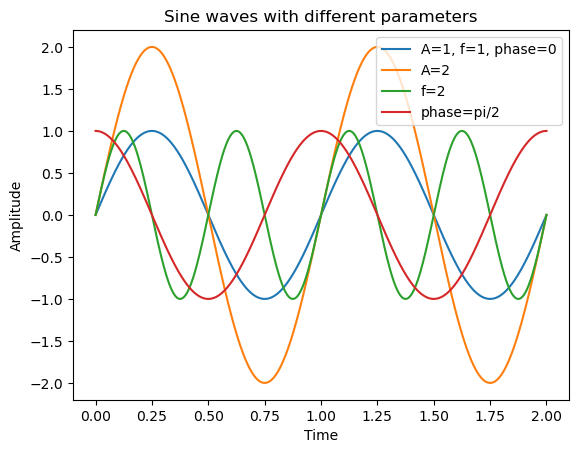

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define function
def func1(time, amplitude=1, frequency=1, phase=0):
    return amplitude * np.sin(2*np.pi*frequency*time + phase)

# time array
t = np.linspace(0, 2, 1000)

# test different values
plt.figure()
plt.plot(t, func1(t), label='A=1, f=1, phase=0')          # default
plt.plot(t, func1(t, amplitude=2), label='A=2')
plt.plot(t, func1(t, frequency=2), label='f=2')
plt.plot(t, func1(t, phase=np.pi/2), label='phase=pi/2')

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Sine waves with different parameters")
plt.legend()
plt.show()

## Exercise 2

A satellite has a circular orbit around the Earth with a period $T$. 
  1. [2] Prove that its altitude $h$ above the Earth‘s surface is ($M$ is Earth’s mass and $R$ its radius):
$$h={\left ( \frac{GMT^2}{4\pi^2} \right )}^{1/3} - R$$
    * Write the proof in Markdown in the notebook directly, no need to use python. 
    * Follow the [markdown guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb) if you need some help with Markdown.
    * Do pay particular attention to the `Equations:` section, and the linked [LaTeX/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics ) wikibook to make nicely formatted equations. You will need this for the assignments.
  2. [2] Write a function to evaluate $h$.
  3. [2] Write a program that requests user input of $T$ and then prints out the altitude in kilometre
  4. [2] Hence find the altitudes of satellites that orbit the Earth once a day (‘geosynchronous’ orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?

In [5]:
import numpy as np

# constants
G = 6.67430e-11        
M = 5.972e24           
R = 6.371e6           

def altitude(T):
    h = (G*M*T**2 / (4*np.pi**2))**(1/3) - R
    return h

In [8]:
# ask user for T (in seconds)
T = float(input("Enter orbital period T (seconds): "))

# compute altitude (meters)
h = altitude(T)

# convert to km
h_km = h / 1000

# print result
print("Altitude =", altitude(T), "km")

# value = float(input("prompt"))
# result = function(value)
# result = result / unit_conversion
# print(result)

Enter orbital period T (seconds):  5


Altitude = -6307802.20416442 km


## Exercise 3 

  1. [4] Write a function `linfit(x,y)` to perform a least squares fit of data using the method described last year in PX1224 week 4 to return estimates of slope and intercept (and their errors).
  2. [2] Put your functions into your own package, using a suitable file name. Type the code you want to be in the package (including comments!) in a cell of the notebook, pick a name for the file and add `%%writefile <file_name>.py` at the top of the cell to have the notebook create the file.
  3. [2] Test out your package by importing it, defining some test data and plotting a graph of the data and fitted straight line. (Label the axes and give the graph a title.)

**IMPORTANT**: The `linfit` function itself must be self contained. It must only take in the x- and y-data, and return m, dm, c and dc. It must not do anything else, such as print or plot data - that should all be done outside the function.

In [10]:
import numpy as np

def linfit(x, y):
    N = len(x)

    xbar = np.mean(x)
    ybar = np.mean(y)

    Sxx = np.sum((x - xbar)**2)
    Sxy = np.sum((x - xbar)*(y - ybar))

    m = Sxy / Sxx                  # slope
    c = ybar - m*xbar              # intercept

    # estimate scatter
    y_fit = m*x + c
    sigma2 = np.sum((y - y_fit)**2) / (N - 2)

    dm = np.sqrt(sigma2 / Sxx)     # error on slope
    dc = np.sqrt(sigma2*(1/N + xbar**2/Sxx))  # error on intercept

    return m, c, dm, dc

In [15]:
%%writefile myfit.py
import numpy as np

def linfit(x, y):
    """
    Least-squares straight-line fit: y = m x + c
    Returns: m, c, dm, dc
    """
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)

    N = len(x)
    xbar = np.mean(x)
    ybar = np.mean(y)

    Sxx = np.sum((x - xbar)**2)
    Sxy = np.sum((x - xbar)*(y - ybar))

    m = Sxy / Sxx
    c = ybar - m*xbar

    yfit = m*x + c
    sigma2 = np.sum((y - yfit)**2) / (N - 2)

    dm = np.sqrt(sigma2 / Sxx)
    dc = np.sqrt(sigma2 * (1/N + xbar**2 / Sxx))

    return m, c, dm, dc

Overwriting myfit.py


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import myfit

# test data
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([1.0, 3.9, 9.0, 16.2, 25.1], dtype=float)

m, c, dm, dc = myfit.linfit(x, y)

# fitted line
yfit = m*x + c

plt.figure()
plt.plot(x, y, 'o', label="data")
plt.plot(x, yfit, '-', label=f"fit: y={m:.3f}x+{c:.3f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test of myfit.linfit")
plt.legend()
plt.show()

print(f"m = {m:.4f} ± {dm:.4f}")
print(f"c = {c:.4f} ± {dc:.4f}")

<class 'ModuleNotFoundError'>: No module named 'myfit'